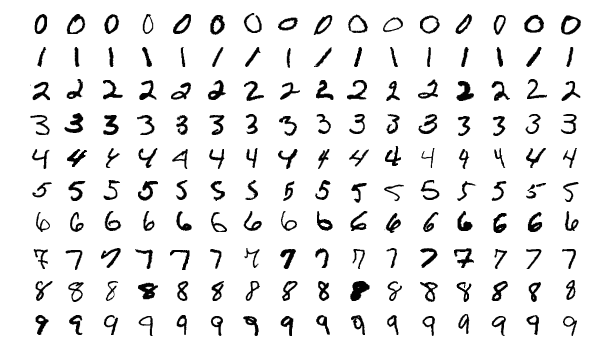

In this notebook, we are going to dive into the MNIST (Modified National Institute of Standards and Technology) database. It can be said that the MNIST handprinted character image dataset is the “Hello World” implementation for machine learning, and the dataset is used as a worldwide machine learning benchmark. It is an extremely good database for people who want to try machine learning techniques and pattern recognition methods on real-world data while spending minimal time and effort on data preprocessing and formatting. Its simplicity and ease of use are what make this dataset so widely used and deeply understood. Therefore, the goal of this tutorial is to show you how this dataset can be used in a digits recognition example using Convolutional Neural Network (CNN), which achieves a high classification accuracy on the test dataset. On a larger perspective, we will emphasize on MNIST’s importance and impact in the world of machine learning.

MNIST is a large database of small, square 28x28 pixel grayscale images of handwritten single digits between 0 and 9. It consists of a total of 70,000 handwritten images of digits, with the training set having 60,000 images and the test set having 10,000. All images are labeled with the respective digit that they represent. There are a total of 10 classes of digits (from 0 to 9).

Our task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively using a CNN that will be able to recognize the handwritten digits. CNN is a type of deep neural network commonly used for computer vision applications. So we will build an image classifier TensorFlow’s Keras API on the MNIST dataset. Keras is a Python library and is highly recommended for beginners due to its smooth learning curve. It is very commonly used in implementing neural networks. 

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

TensorFlow kütüphanesi altında yer alan Keras modülünden MNIST veri kümesini yüklemek için kullanılır. MNIST, el yazısı rakamlarını içeren bir veri kümesidir ve makine öğrenimi modellerinin eğitilmesi için sıklıkla kullanılır. load_data fonksiyonu, veri kümesini indirir ve yükler. Bu kodun çalışması için TensorFlow kütüphanesinin bilgisayarınızda yüklü ve kurulu olması gereklidir.

In [3]:
(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

MNIST veri kümesinden yüklenen verileri eğitim ve test veri setlerine ayırmak için kullanılır. load_data() fonksiyonu, MNIST veri kümesini yükler ve bu satırda eğitim verileri (X_train, y_train) ve test verileri (X_test, y_test) olarak ayrıştırılır. X_train ve X_test verileri, resimlerin piksel değerlerini içeren 3 boyutlu tensörlerdir. y_train ve y_test verileri ise, resimlerin doğru sınıf etiketlerini içeren 1 boyutlu tensörlerdir.

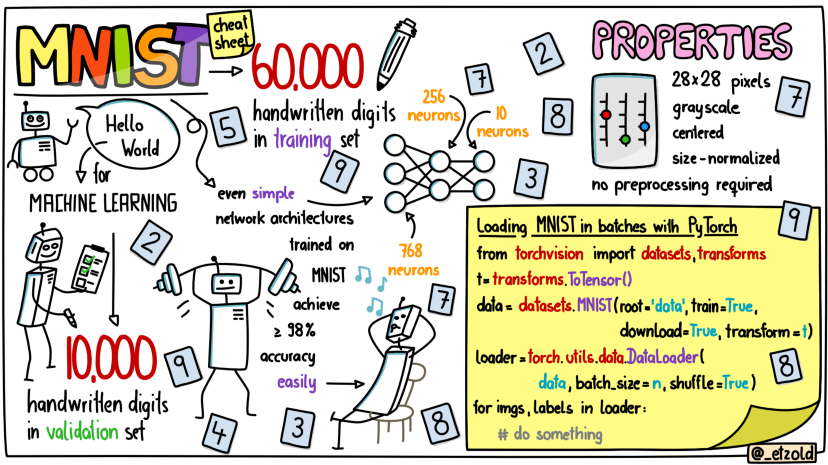

In [4]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


X_train ve y_train verilerinin şeklini ekrana yazdırır. X_train.shape ifadesi, eğitim verilerinin şeklini 3 boyutlu bir tensör olarak döndürür. Bu tensörün ilk boyutu, eğitim örneklerinin sayısıdır. İkinci ve üçüncü boyutlar, resimlerin yüksekliği ve genişliği olarak düzenlenmiştir. y_train.shape ifadesi ise, y_train verilerinin şeklini 1 boyutlu bir tensör olarak döndürür. Bu tensörün boyutu, eğitim örneklerinin sayısıdır. Her bir öğe, eşleşen örnek için doğru sınıf etiketini içerir. Bu kodun çıktısı, eğitim verilerinin şeklini ve etiketlerinin şeklini belirtir.

In [5]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


X_test tensörü, MNIST veri kümesindeki test örneklerinin görüntülerini içerir. Bu görüntüler siyah beyaz olduğundan (grayscale), her biri yalnızca bir kanala (channel) sahiptir ve bu nedenle üçüncü boyutu yoktur. Bu yüzden X_test tensörü (10000, 28, 28) şeklindedir, yani 10.000 test örneği, her biri 28x28 boyutlarında bir siyah beyaz görüntü içerir.

Bununla birlikte, eğer resimler renkli (RGB) olsaydı, her pikselin kırmızı, yeşil ve mavi kanalları olacaktı. Bu durumda, X_test tensörü üçüncü boyuta sahip olacaktı ve şekli (10000, 28, 28, 3) olacaktı.

MNIST veri kümesi, rakamların el yazısı ile yazılmış görüntülerini içerir. Bu görüntülerin sınıflandırması, yani hangi rakamın hangi görüntüye karşılık geldiğini belirleme problemi, bir dizi sınıflandırma probleminin örneğidir. MNIST veri kümesinde, her görüntü yalnızca bir rakam içerir. Bu nedenle, her bir görüntü yalnızca bir sınıfa aittir ve y_train ve y_test tensörleri, her bir görüntünün ait olduğu tek bir sınıf etiketini içerir.

y_train tensörünün boyutu, eğitim setindeki örnek sayısıdır. Örneğin, eğitim setinde 50.000 örnek varsa, y_train tensörü 50.000 boyutunda olacaktır. Her bir öğe, eşleşen örneğin doğru sınıf etiketini belirtir. y_train tensörü tek boyutlu bir tensördür, çünkü her bir öğe yalnızca bir sınıf etiketini içerir. Yani her bir öğe, örneğin "Bu görüntü 5 rakamını temsil eder" şeklinde bir bilgi içerir. Dolayısıyla, y_train tensörü tek boyutlu bir şekilde tanımlanabilir.

In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
# Checking the shape of one image
X_train[68].shape

(28, 28)

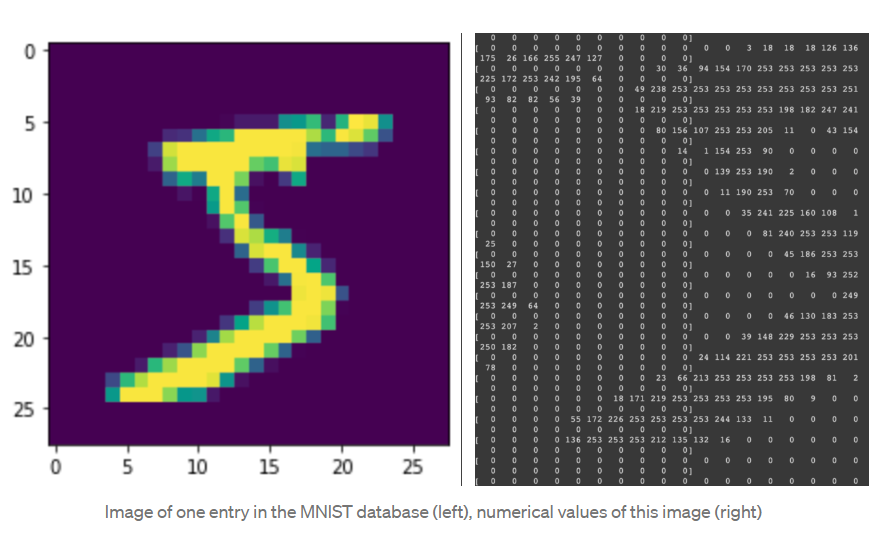

In [8]:
X_train[169]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  42, 235, 255,  84,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,
        132, 208, 253, 253, 171, 108,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

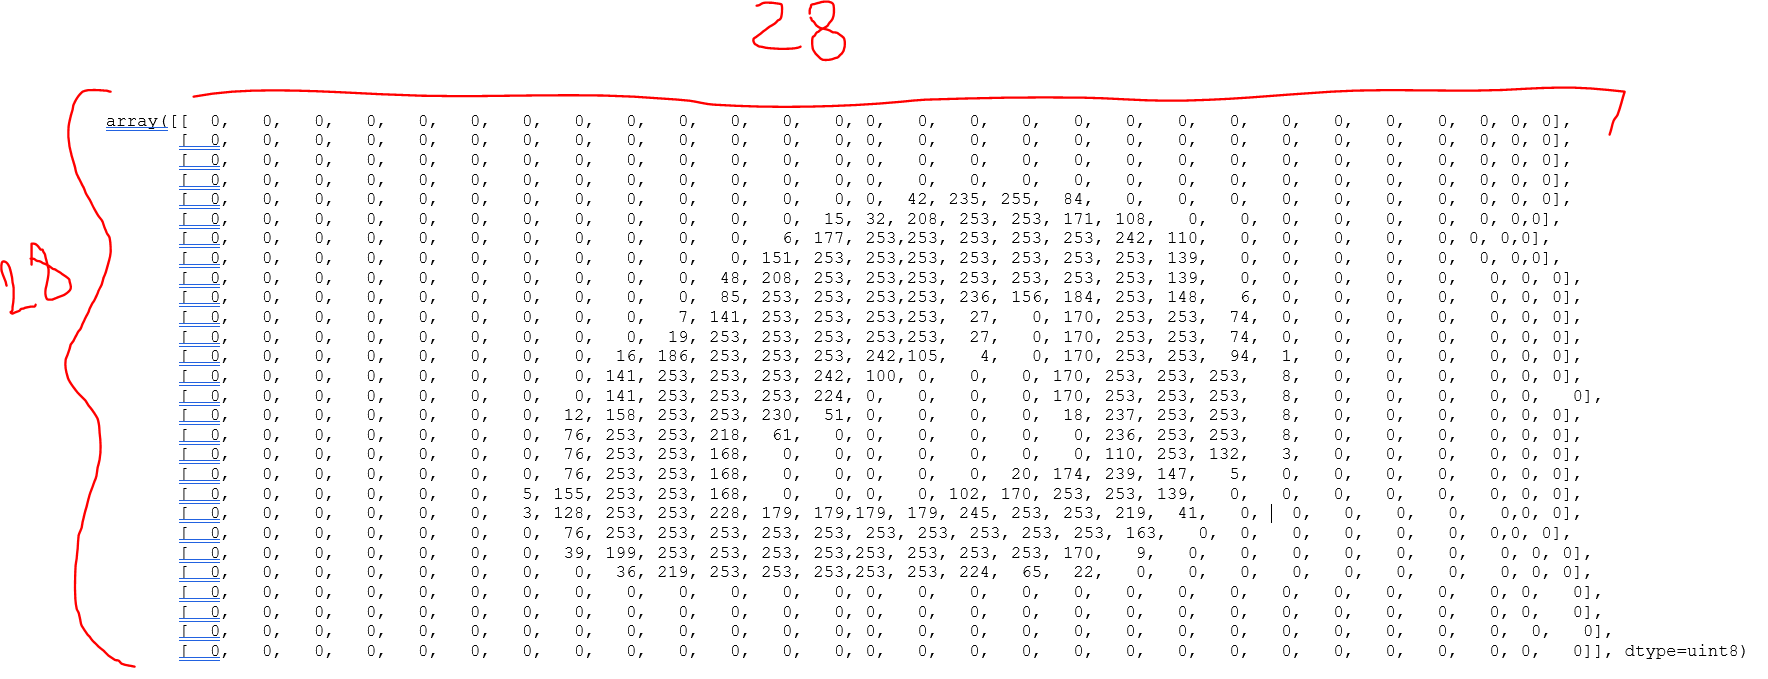

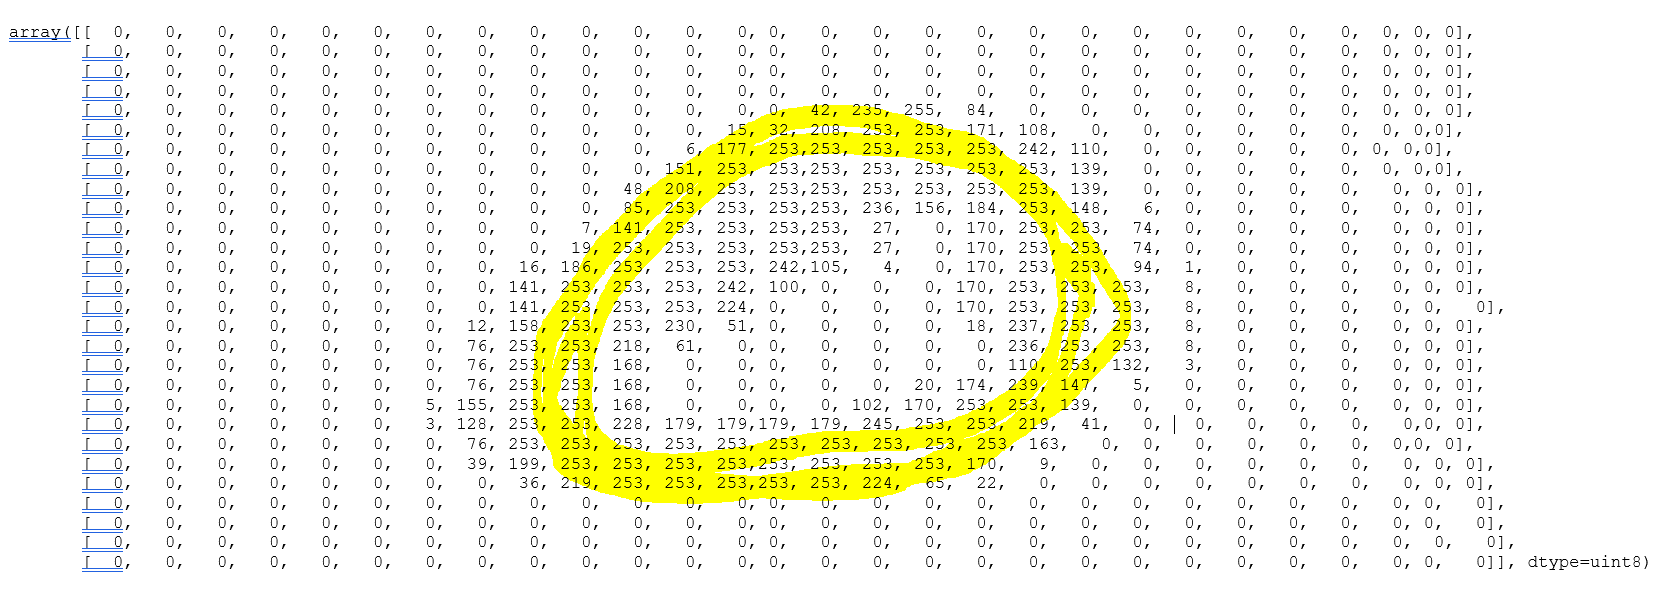

In [9]:
import matplotlib.pyplot as plt

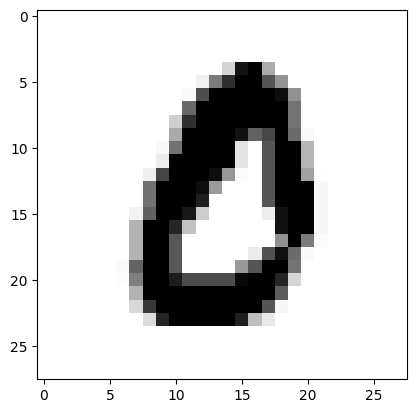

In [10]:
plt.imshow(X_train[169], cmap= plt.cm.binary);

cmap= plt.cm.binary parametresi, siyah beyaz bir görüntü elde etmek için kullanılan bir renk haritası (color map) belirtir.

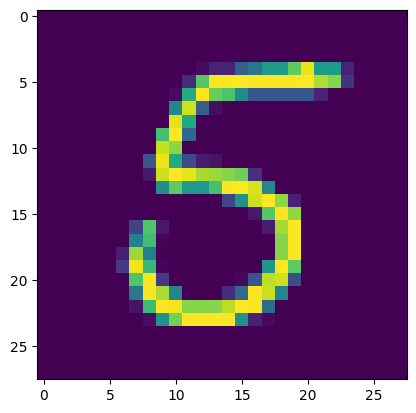

In [11]:
plt.imshow(X_train[768]);

In [12]:
X_train[768]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,
         24,  24,  77,  98, 139, 139, 192, 245, 139, 139,  25,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30, 187,
        253, 253, 254, 253, 253, 253, 253, 254, 224, 207,  37,   0,   0,
          0,   0],
       [  

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Bu kod bloğu, MNIST veri kümesinden rastgele seçilen 3 satır ve 6 sütun boyutunda bir alt örneklem oluşturur. Daha sonra, alt örneklemdeki her örneğin etiketini (y_train) ve görüntüsünü (X_train) görüntüler.

f, ax = plt.subplots(3, 6, figsize=(12,5),... satırı, alt örneklem için 3 satır ve 6 sütundan oluşan bir alt grafik oluşturur ve ax değişkeninde saklar. gridspec_kw argümanı, alt grafiğin satır ve sütunları arasındaki boşlukları ayarlar. squeeze=True argümanı, alt grafiklerin ekstra boyutunu kaldırır ve sadece satır ve sütun boyutlarını bırakır.

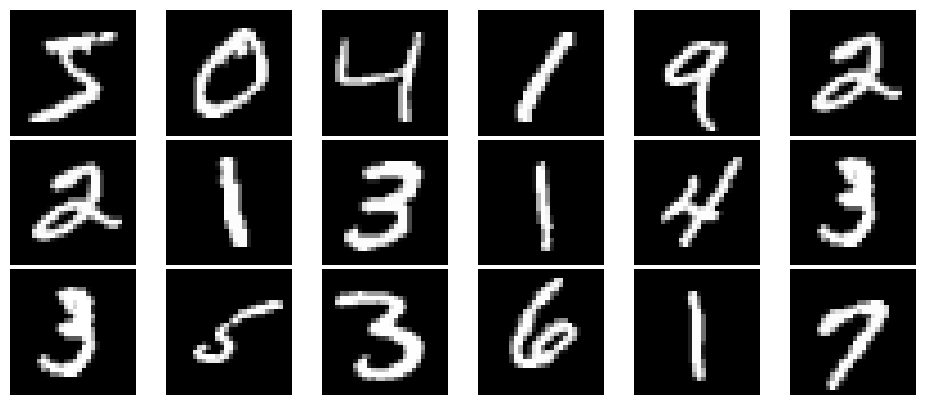

In [14]:
num_rows, num_cols = 3, 6                                       # Datadan 3 tane row, 6 tane column sectik.
f, ax = plt.subplots(3, 6, figsize=(12,5),
                     gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
plt.show()
plt.close()

C:\Users\nazim\AppData\Local\Temp\ipykernel_6852\3924017328.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


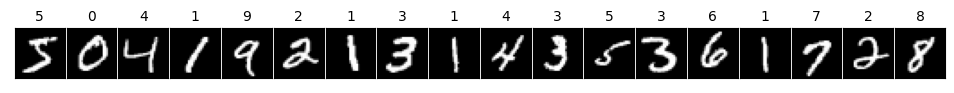

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=18, figsize=(12,5),
                         gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                         squeeze=True)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(str(y_train[i]), fontsize=10)
    
plt.tight_layout()
plt.show()

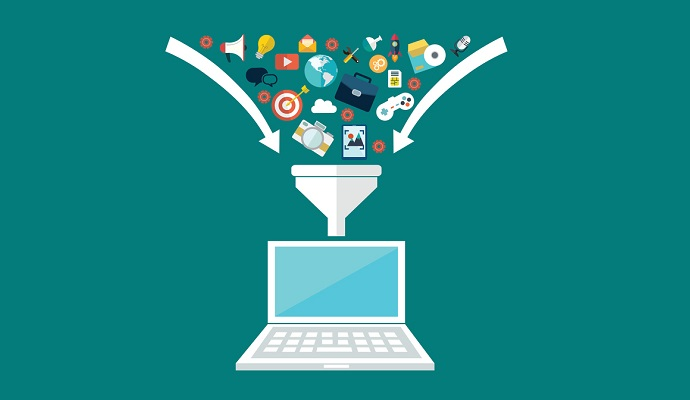

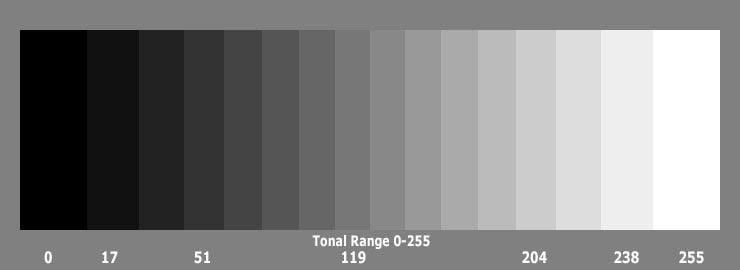

## Data Preprocessing

In [16]:
X_train[9].min()

0

In [17]:
X_train[9].max()

255

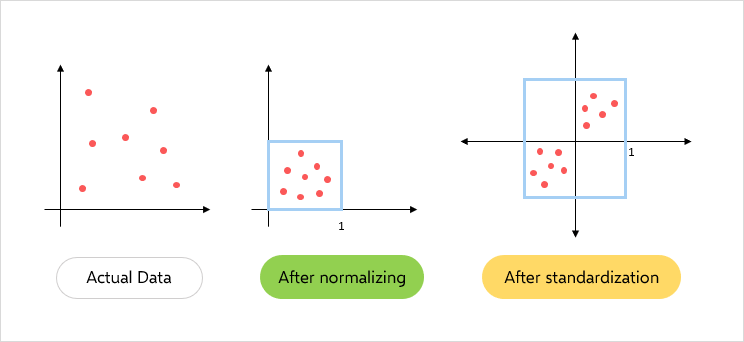

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Bu kod bloğu, MNIST veri setindeki görüntülerin piksel değerlerini 0-255 aralığından 0-1 aralığına dönüştürmek için kullanılır. İlk iki satır, X_train ve X_test numpy dizilerinin veri türünü float32'ye dönüştürür. Sonraki iki satır, her pikselin maksimum değeri olan 255'e bölerek, her pikselin 0 ile 1 arasında bir ondalık sayı olarak temsil edilmesini sağlar. Bu, ağın daha iyi öğrenmesine yardımcı olabilir ve verilerin işlenmesi daha kolay hale gelir.

In [19]:
X_train[17]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
X_train[17].min()

0.0

In [21]:
X_train[17].max()

1.0

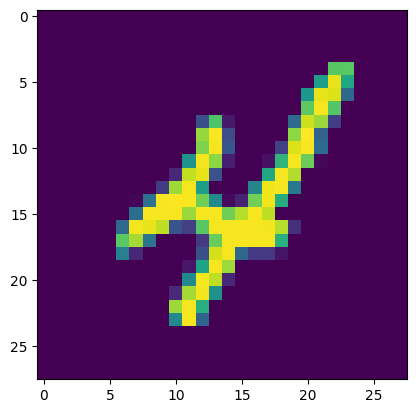

In [22]:
plt.imshow(X_train[9])

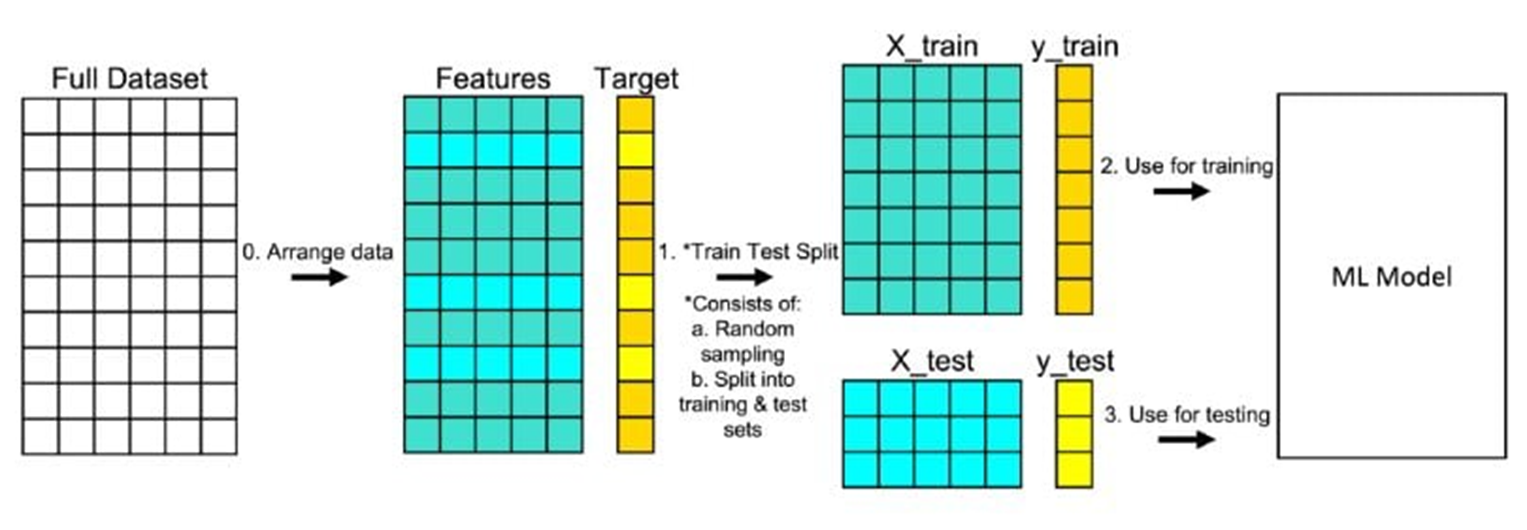

In [23]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


Yukarıdaki kod bloğu, MNIST veri setindeki görüntülerin boyutunu uygun şekilde yeniden şekillendirir. MNIST veri setindeki her bir resim, 28x28 piksel boyutundadır. Ancak, CNN modeli için, girdi olarak kullanılan verinin 3D tensör şeklinde olması gerektiği için, her bir resim 28x28x1 boyutunda bir tensöre dönüştürülür.

Bu işlem, reshape() fonksiyonu kullanılarak yapılır. Burada, X_train ve X_test dizileri, sırasıyla eğitim ve test verilerini içerir. X_train.shape[0] ve X_test.shape[0], her bir dizinin içindeki örnek sayısını temsil eder. Bu örneklerin her biri, 28x28 boyutunda bir resimdir.

reshape() fonksiyonunda, her bir örnek için yeni boyutlar belirtilir. X_train.shape[0] ve X_test.shape[0] kullanılarak, her bir dizideki örnek sayısı belirlenir. Yani, her bir örnek, 28x28x1 boyutunda bir tensöre dönüştürülür.

Sonuç olarak, X_train ve X_test dizileri, her biri 28x28x1 boyutunda 3D tensörler içerir. Bu tensörler, CNN modelinin girdi olarak kullanılabilecek uygun şekle sahiptir.

MNIST veri setindeki görüntüleri, konvolüsyonel sinir ağları (CNN) için uygun hale getirmek için kullanılır. reshape fonksiyonu, X_train ve X_test numpy dizilerindeki her bir görüntüyü, yükseklik ve genişlik boyutları 28x28 piksel olan ve yalnızca bir renk kanalı olan 4 boyutlu tensörlere dönüştürür.

Bu dönüşüm, CNN'lerin girdi olarak kabul ettiği tensör biçimine uymaktadır. 4 boyutlu tensörlerde ilk boyut, görüntü sayısını temsil eder, ikinci ve üçüncü boyutlar görüntü yüksekliği ve genişliğini temsil eder, dördüncü boyut ise her pikseldeki renk kanalı sayısını temsil eder (bu örnekte yalnızca 1 renk kanalı vardır).

In [24]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Eğer X_train, 28x28 boyutunda tek bir matris (shape=(60000, 28, 28)) olsaydı, onu bir CNN modeline sokmak mümkün olmazdı çünkü CNN modelleri 4 boyutlu bir veri yapısı beklerler. Bu nedenle, reshape işlemi yapılarak X_train, 4 boyutlu bir veri yapısı olan (60000, 28, 28, 1) şekline dönüştürülmüştür.

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
X_train[777].shape

(28, 28, 1)

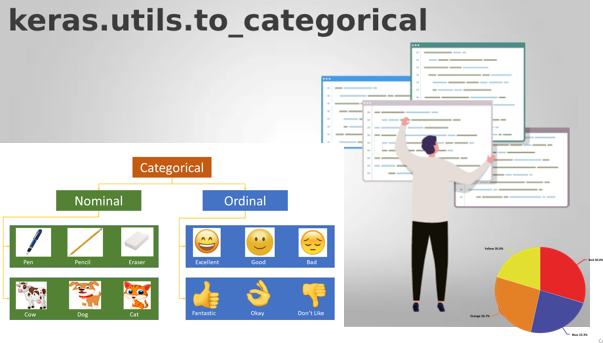

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
y_train[115]

4

In [29]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

Yukarıdaki kod bloğu, MNIST veri setindeki etiketleri (labels) uygun şekilde kodlamak için kullanılır. MNIST veri setindeki her bir resim, 0'dan 9'a kadar olan bir rakamı temsil eder. Bu rakamlar, eğitim ve test verilerinde sınıf etiketleri (class labels) olarak kullanılır.

Ancak, makine öğrenimi algoritmaları, sınıf etiketlerini doğrudan kullanmak yerine, genellikle vektörel formatta kodlanmış halleri ile çalışırlar. Bu nedenle, to_categorical() fonksiyonu kullanılarak, sınıf etiketleri, 10 boyutlu bir vektör olarak kodlanır.

Örneğin, bir resmin etiketi "5" ise, bu etiket to_categorical() fonksiyonu kullanılarak [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] şekline dönüştürülür. Burada, "5" rakamı 6. indekste bulunur ve bu indeks, 1 ile kodlanırken, diğer indeksler 0 ile kodlanır.


Bu kod, y_train ve y_test etiketlerini (labels) ikili sınıf matrisine (binary class matrix) dönüştürüyor. Bu, çok sınıflı bir sınıflandırma problemi olduğunda kullanışlıdır. Burada 10 farklı sınıf olduğu için 10'a eşit bir şekilde 10 boyutlu bir matris oluşturuyor.

Yani, (10000, 10) şeklinde bir Y_test matrisi oluşacaktır.

In [30]:
Y_train[115]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
Y_train[715]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

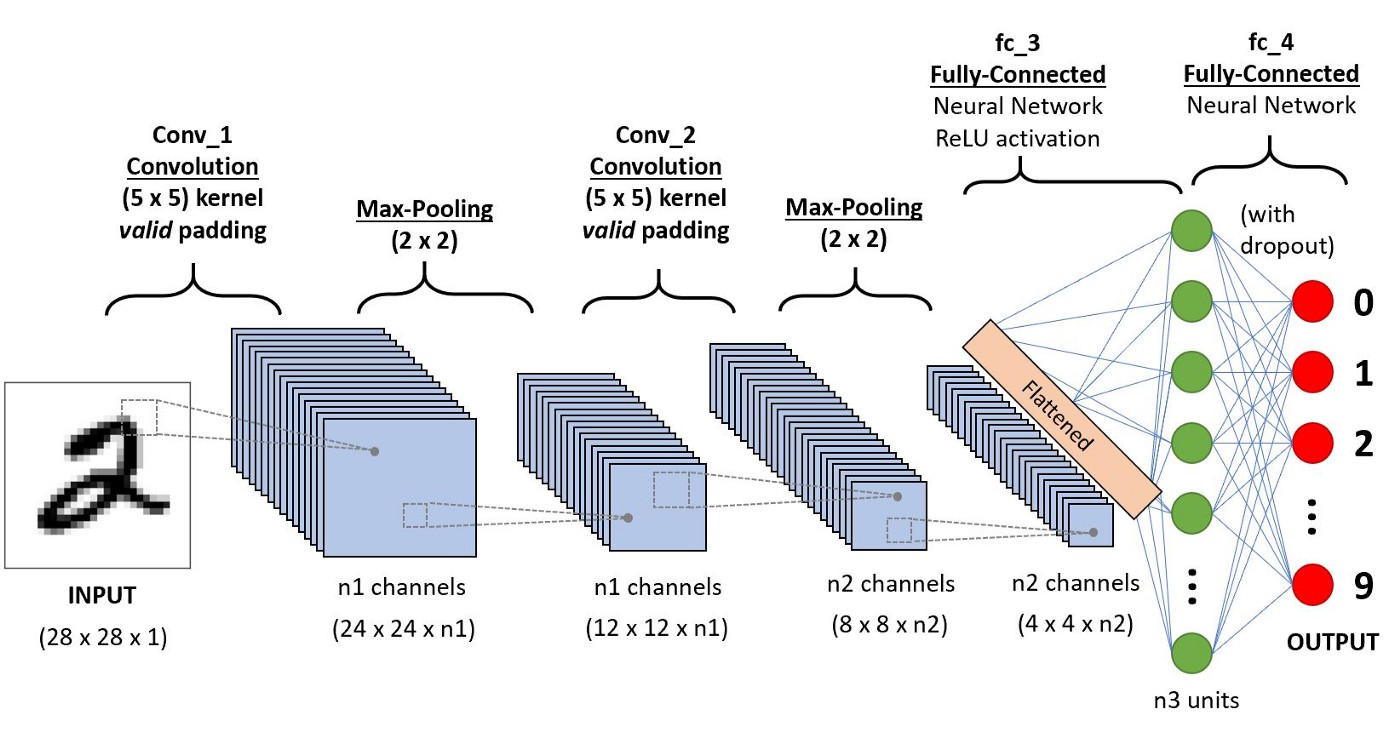

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

Burada "2D" ifadesi, iki boyutlu görüntüler üzerinde işlem yapacağımızı belirtmek için kullanılır. Yani, bu özellikle resim işleme uygulamalarında kullanılan Convolutional Neural Networks (CNN) için kullanılır. CNN'ler, 2D filtreleri kullanarak görüntü verilerinde özelliklerin çıkarılmasına izin veren bir derin öğrenme mimarisidir. Bu nedenle, CNN'ler genellikle 2D konvolüsyon, 2D Max Pooling ve 2D veri formatları kullanırlar.

Bu, sinir ağında kullanılacak verinin 2 boyutlu olduğunu gösterir. Bu durumda, veri 28x28 piksel boyutlarında olduğu için 2D olarak ifade edilir. 3D ifade, örneğin video gibi 3 boyutlu veri türleri için kullanılır.

In [33]:
model = Sequential()

# Convolutional katmanlar
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Batch Normalization ekleyin
model.add(BatchNormalization())

# Dropout ekleyin (dropout oranı: 0.25)
model.add(Dropout(0.25))

# Yeni bir Convolutional katman
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Batch Normalization ekleyin
model.add(BatchNormalization())

# Dropout ekleyin (dropout oranı: 0.25)
model.add(Dropout(0.25))

# Tam bağlantılı katmanlar
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Batch Normalization ekleyin
model.add(BatchNormalization())

# Dropout ekleyin (dropout oranı: 0.5)
model.add(Dropout(0.5))

# Çıkış katmanı
model.add(Dense(10, activation='softmax'))

# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model özetini göster
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 26, 26, 32)        320       


 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         


 )                                                               


 batch_normalization (BatchN  (None, 13, 13, 32)       128       


 ormalization)                                                   


 dropout (Dropout)           (None, 13, 13, 32)        0         


 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     


 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         


 2D)                                                             


 batch_normalization_1 (Batc  (None, 5, 5, 64)         256       


 hNormalization)                                                 


 dropout_1 (Dropout)         (None, 5, 5, 64)          0         


 flatten (Flatten)           (None, 1600)              0         


 dense (Dense)               (None, 128)               204928    


 batch_normalization_2 (Batc  (None, 128)              512       


 hNormalization)                                                 


 dropout_2 (Dropout)         (None, 128)               0         


 dense_1 (Dense)             (None, 10)                1290      


Total params: 225,930


Trainable params: 225,482


Non-trainable params: 448


_________________________________________________________________


input_shape parametresi giriş veri boyutunu belirtmek için gereklidir. Modelin ilk katmanında bu parametre belirtilmezse, model eğitimi sırasında veri boyutu uyumsuzluğu hatası alınır. Bu nedenle, modelin ilk katmanında input_shape parametresi belirtilmelidir.

In [34]:
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 26, 26, 32)        320       


 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         


 )                                                               


 batch_normalization (BatchN  (None, 13, 13, 32)       128       


 ormalization)                                                   


 dropout (Dropout)           (None, 13, 13, 32)        0         


 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     


 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         


 2D)                                                             


 batch_normalization_1 (Batc  (None, 5, 5, 64)         256       


 hNormalization)                                                 


 dropout_1 (Dropout)         (None, 5, 5, 64)          0         


 flatten (Flatten)           (None, 1600)              0         


 dense (Dense)               (None, 128)               204928    


 batch_normalization_2 (Batc  (None, 128)              512       


 hNormalization)                                                 


 dropout_2 (Dropout)         (None, 128)               0         


 dense_1 (Dense)             (None, 10)                1290      


Total params: 225,930


Trainable params: 225,482


Non-trainable params: 448


_________________________________________________________________


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

X_train ve Y_train kullanılarak model eğitildikten sonra, X_test ve Y_test verileri bu öğrenmenin performansını değerlendirmek için kullanılır. X_test verileri, modelin öğrendiği özellikleri kullanarak tahminler yapmasına ve gerçek etiketlerle karşılaştırmasına olanak tanır. Y_test verileri, doğru tahmin oranının hesaplanması için gerçek etiketler olarak kullanılır. Model, X_test verileri üzerindeki performansına göre, daha önce hiç görmediği yeni veriler üzerinde ne kadar iyi performans gösterebileceği hakkında fikir verebilir.

In [37]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10


   1/1875 [..............................] - ETA: 6:28:55 - loss: 2.7012 - accuracy: 0.1875

   2/1875 [..............................] - ETA: 4:37 - loss: 3.4648 - accuracy: 0.1719   

   3/1875 [..............................] - ETA: 4:25 - loss: 3.1757 - accuracy: 0.1979

   4/1875 [..............................] - ETA: 4:28 - loss: 3.0567 - accuracy: 0.2031

   5/1875 [..............................] - ETA: 4:36 - loss: 2.9385 - accuracy: 0.2062

   6/1875 [..............................] - ETA: 4:32 - loss: 2.8430 - accuracy: 0.2292

   7/1875 [..............................] - ETA: 4:38 - loss: 2.7076 - accuracy: 0.2589

   8/1875 [..............................] - ETA: 4:42 - loss: 2.6165 - accuracy: 0.2656

   9/1875 [..............................] - ETA: 4:48 - loss: 2.5285 - accuracy: 0.2778

  10/1875 [..............................] - ETA: 4:48 - loss: 2.4443 - accuracy: 0.3000

  11/1875 [..............................] - ETA: 4:45 - loss: 2.3434 - accuracy: 0.3295

  12/1875 [..............................] - ETA: 4:45 - loss: 2.2600 - accuracy: 0.3490

  13/1875 [..............................] - ETA: 4:45 - loss: 2.1593 - accuracy: 0.3774

  14/1875 [..............................] - ETA: 4:42 - loss: 2.1034 - accuracy: 0.3929

  15/1875 [..............................] - ETA: 4:41 - loss: 2.0560 - accuracy: 0.4062

  16/1875 [..............................] - ETA: 4:41 - loss: 1.9730 - accuracy: 0.4297

  17/1875 [..............................] - ETA: 4:38 - loss: 1.9198 - accuracy: 0.4485

  18/1875 [..............................] - ETA: 4:40 - loss: 1.8867 - accuracy: 0.4583

  19/1875 [..............................] - ETA: 4:38 - loss: 1.8221 - accuracy: 0.4770

  20/1875 [..............................] - ETA: 4:39 - loss: 1.7752 - accuracy: 0.4922

  21/1875 [..............................] - ETA: 4:37 - loss: 1.7195 - accuracy: 0.5089

  22/1875 [..............................] - ETA: 4:35 - loss: 1.6645 - accuracy: 0.5227

  23/1875 [..............................] - ETA: 4:36 - loss: 1.6220 - accuracy: 0.5380

  24/1875 [..............................] - ETA: 4:36 - loss: 1.5843 - accuracy: 0.5456

  25/1875 [..............................] - ETA: 4:36 - loss: 1.5505 - accuracy: 0.5562

  26/1875 [..............................] - ETA: 4:37 - loss: 1.5400 - accuracy: 0.5601

  27/1875 [..............................] - ETA: 4:35 - loss: 1.5392 - accuracy: 0.5579

  28/1875 [..............................] - ETA: 4:35 - loss: 1.5049 - accuracy: 0.5670

  29/1875 [..............................] - ETA: 4:35 - loss: 1.4901 - accuracy: 0.5679

  30/1875 [..............................] - ETA: 4:35 - loss: 1.4739 - accuracy: 0.5708

  31/1875 [..............................] - ETA: 4:35 - loss: 1.4438 - accuracy: 0.5806

  32/1875 [..............................] - ETA: 4:38 - loss: 1.4308 - accuracy: 0.5820

  33/1875 [..............................] - ETA: 4:38 - loss: 1.4093 - accuracy: 0.5871

  34/1875 [..............................] - ETA: 4:41 - loss: 1.3869 - accuracy: 0.5947

  35/1875 [..............................] - ETA: 4:43 - loss: 1.3723 - accuracy: 0.5991

  36/1875 [..............................] - ETA: 4:41 - loss: 1.3596 - accuracy: 0.6033

  37/1875 [..............................] - ETA: 4:40 - loss: 1.3502 - accuracy: 0.6064

  38/1875 [..............................] - ETA: 4:39 - loss: 1.3342 - accuracy: 0.6110

  39/1875 [..............................] - ETA: 4:39 - loss: 1.3096 - accuracy: 0.6186

  40/1875 [..............................] - ETA: 4:38 - loss: 1.2936 - accuracy: 0.6234

  41/1875 [..............................] - ETA: 4:38 - loss: 1.2802 - accuracy: 0.6280

  42/1875 [..............................] - ETA: 4:38 - loss: 1.2731 - accuracy: 0.6302

  43/1875 [..............................] - ETA: 4:39 - loss: 1.2573 - accuracy: 0.6344

  44/1875 [..............................] - ETA: 4:38 - loss: 1.2404 - accuracy: 0.6399

  45/1875 [..............................] - ETA: 4:37 - loss: 1.2211 - accuracy: 0.6465

  46/1875 [..............................] - ETA: 4:36 - loss: 1.2060 - accuracy: 0.6501

  47/1875 [..............................] - ETA: 4:36 - loss: 1.1895 - accuracy: 0.6562

  48/1875 [..............................] - ETA: 4:38 - loss: 1.1740 - accuracy: 0.6595

  49/1875 [..............................] - ETA: 4:37 - loss: 1.1651 - accuracy: 0.6607

  50/1875 [..............................] - ETA: 4:37 - loss: 1.1526 - accuracy: 0.6644

  51/1875 [..............................] - ETA: 4:37 - loss: 1.1433 - accuracy: 0.6661

  52/1875 [..............................] - ETA: 4:36 - loss: 1.1304 - accuracy: 0.6689

  53/1875 [..............................] - ETA: 4:42 - loss: 1.1177 - accuracy: 0.6728

  54/1875 [..............................] - ETA: 4:43 - loss: 1.1063 - accuracy: 0.6753

  55/1875 [..............................] - ETA: 4:43 - loss: 1.0963 - accuracy: 0.6778

  56/1875 [..............................] - ETA: 4:44 - loss: 1.0822 - accuracy: 0.6825

  57/1875 [..............................] - ETA: 4:44 - loss: 1.0720 - accuracy: 0.6848

  58/1875 [..............................] - ETA: 4:46 - loss: 1.0661 - accuracy: 0.6853

  59/1875 [..............................] - ETA: 4:48 - loss: 1.0547 - accuracy: 0.6880

  60/1875 [..............................] - ETA: 4:49 - loss: 1.0438 - accuracy: 0.6911

  61/1875 [..............................] - ETA: 4:48 - loss: 1.0351 - accuracy: 0.6947

  62/1875 [..............................] - ETA: 4:49 - loss: 1.0271 - accuracy: 0.6976

  63/1875 [>.............................] - ETA: 4:48 - loss: 1.0187 - accuracy: 0.6989

  64/1875 [>.............................] - ETA: 4:49 - loss: 1.0072 - accuracy: 0.7017

  65/1875 [>.............................] - ETA: 4:49 - loss: 0.9988 - accuracy: 0.7038

  66/1875 [>.............................] - ETA: 4:48 - loss: 0.9903 - accuracy: 0.7055

  67/1875 [>.............................] - ETA: 4:47 - loss: 0.9847 - accuracy: 0.7071

  68/1875 [>.............................] - ETA: 4:46 - loss: 0.9766 - accuracy: 0.7086

  69/1875 [>.............................] - ETA: 4:45 - loss: 0.9705 - accuracy: 0.7106

  70/1875 [>.............................] - ETA: 4:44 - loss: 0.9607 - accuracy: 0.7134

  71/1875 [>.............................] - ETA: 4:45 - loss: 0.9511 - accuracy: 0.7165

  72/1875 [>.............................] - ETA: 4:47 - loss: 0.9440 - accuracy: 0.7183

  73/1875 [>.............................] - ETA: 4:48 - loss: 0.9347 - accuracy: 0.7209

  74/1875 [>.............................] - ETA: 4:48 - loss: 0.9269 - accuracy: 0.7230

  75/1875 [>.............................] - ETA: 4:49 - loss: 0.9250 - accuracy: 0.7237

  76/1875 [>.............................] - ETA: 4:51 - loss: 0.9247 - accuracy: 0.7237

  77/1875 [>.............................] - ETA: 4:52 - loss: 0.9156 - accuracy: 0.7265

  78/1875 [>.............................] - ETA: 4:51 - loss: 0.9080 - accuracy: 0.7288

  79/1875 [>.............................] - ETA: 4:52 - loss: 0.9084 - accuracy: 0.7282

  80/1875 [>.............................] - ETA: 4:51 - loss: 0.9059 - accuracy: 0.7285

  81/1875 [>.............................] - ETA: 4:51 - loss: 0.9009 - accuracy: 0.7299

  82/1875 [>.............................] - ETA: 4:51 - loss: 0.8977 - accuracy: 0.7302

  83/1875 [>.............................] - ETA: 4:51 - loss: 0.8909 - accuracy: 0.7319

  84/1875 [>.............................] - ETA: 4:50 - loss: 0.8870 - accuracy: 0.7329

  85/1875 [>.............................] - ETA: 4:51 - loss: 0.8821 - accuracy: 0.7338

  86/1875 [>.............................] - ETA: 4:51 - loss: 0.8773 - accuracy: 0.7355

  87/1875 [>.............................] - ETA: 4:51 - loss: 0.8708 - accuracy: 0.7374

  88/1875 [>.............................] - ETA: 4:52 - loss: 0.8634 - accuracy: 0.7397

  89/1875 [>.............................] - ETA: 4:53 - loss: 0.8609 - accuracy: 0.7416

  90/1875 [>.............................] - ETA: 4:53 - loss: 0.8596 - accuracy: 0.7420

  91/1875 [>.............................] - ETA: 4:54 - loss: 0.8543 - accuracy: 0.7435

  92/1875 [>.............................] - ETA: 4:54 - loss: 0.8480 - accuracy: 0.7452

  93/1875 [>.............................] - ETA: 4:53 - loss: 0.8419 - accuracy: 0.7470

  94/1875 [>.............................] - ETA: 4:52 - loss: 0.8380 - accuracy: 0.7480

  95/1875 [>.............................] - ETA: 4:51 - loss: 0.8322 - accuracy: 0.7493

  96/1875 [>.............................] - ETA: 4:50 - loss: 0.8264 - accuracy: 0.7513

  97/1875 [>.............................] - ETA: 4:49 - loss: 0.8216 - accuracy: 0.7529

  98/1875 [>.............................] - ETA: 4:48 - loss: 0.8172 - accuracy: 0.7538

  99/1875 [>.............................] - ETA: 4:47 - loss: 0.8132 - accuracy: 0.7554

 100/1875 [>.............................] - ETA: 4:46 - loss: 0.8076 - accuracy: 0.7569

 101/1875 [>.............................] - ETA: 4:45 - loss: 0.8044 - accuracy: 0.7580

 102/1875 [>.............................] - ETA: 4:44 - loss: 0.8017 - accuracy: 0.7586

 103/1875 [>.............................] - ETA: 4:43 - loss: 0.7984 - accuracy: 0.7594

 104/1875 [>.............................] - ETA: 4:42 - loss: 0.7953 - accuracy: 0.7599

 105/1875 [>.............................] - ETA: 4:41 - loss: 0.7933 - accuracy: 0.7610

 106/1875 [>.............................] - ETA: 4:40 - loss: 0.7892 - accuracy: 0.7621

Batch size belirtilmediğinde varsayılan olarak 32 kullanılır. Bu nedenle batch_size=32 yerine batch_size=None yazılsa bile sonuçta aynı batch size kullanılacaktır. Ancak, bu belirsizliğe neden olduğundan, batch size'ı belirtilmesi önerilir.

In [38]:
model.metrics_names          # Modelde kullanilan metrikler

['loss', 'accuracy']

In [39]:
model.history.history        # Modelin egitimdeki loss ve accuracy history' si 

{'loss': [0.20053714513778687,
  0.09108100831508636,
  0.07432970404624939,
  0.06388597190380096,
  0.05715835839509964,
  0.05192629247903824,
  0.048133864998817444,
  0.04398582875728607,
  0.04055679589509964,
  0.038516219705343246],
 'accuracy': [0.9391999840736389,
  0.972599983215332,
  0.9772833585739136,
  0.9800166487693787,
  0.9828500151634216,
  0.9841166734695435,
  0.9850333333015442,
  0.9863333106040955,
  0.987416684627533,
  0.987933337688446],
 'val_loss': [0.04626116529107094,
  0.04010668024420738,
  0.0507635697722435,
  0.031556446105241776,
  0.033019427210092545,
  0.02683020941913128,
  0.02275567315518856,
  0.02404404990375042,
  0.021177830174565315,
  0.020286105573177338],
 'val_accuracy': [0.9840999841690063,
  0.9868000149726868,
  0.9843999743461609,
  0.9890999794006348,
  0.9876000285148621,
  0.9915000200271606,
  0.9922000169754028,
  0.9919999837875366,
  0.992900013923645,
  0.9937000274658203]}

In [40]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.200537,0.939200,0.046261,0.9841
1,0.091081,0.972600,0.040107,0.9868
2,0.074330,0.977283,0.050764,0.9844
3,0.063886,0.980017,0.031556,0.9891
4,0.057158,0.982850,0.033019,0.9876


In [41]:
summary.tail()

,loss,accuracy,val_loss,val_accuracy
5,0.051926,0.984117,0.026830,0.9915
6,0.048134,0.985033,0.022756,0.9922
7,0.043986,0.986333,0.024044,0.9920
8,0.040557,0.987417,0.021178,0.9929
9,0.038516,0.987933,0.020286,0.9937


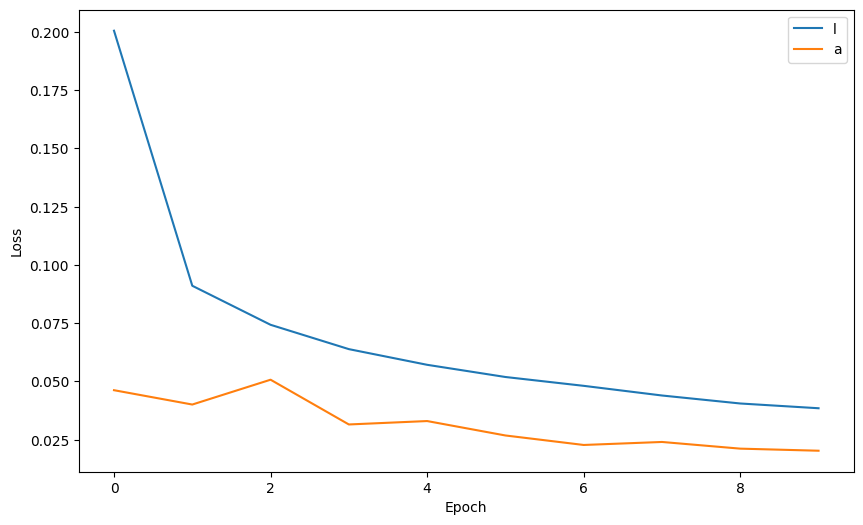

In [42]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)              # DataFrame' den cekilen loss degerleri
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels');

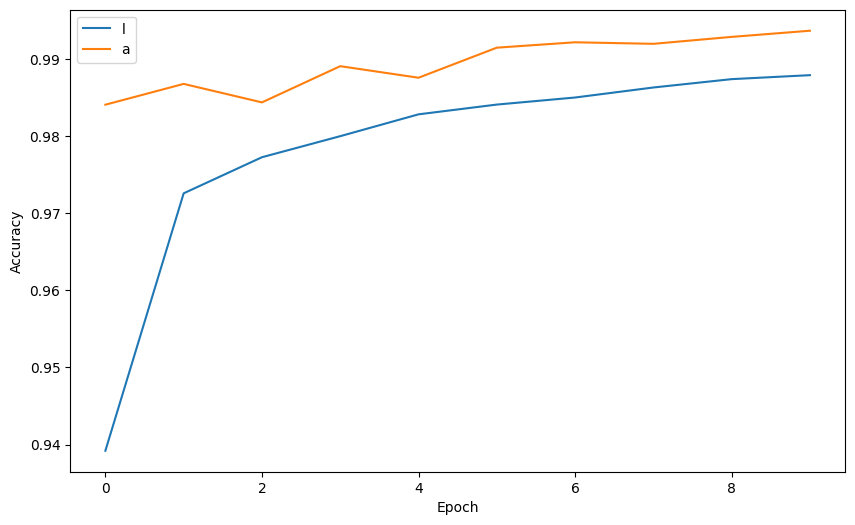

In [43]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        # DataFrame' den cekilen accuracy degerleri
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [44]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 14s 43ms/step - loss: 0.0203 - accuracy: 0.9937
[0.020286105573177338, 0.9937000274658203]


model.evaluate() fonksiyonu, modelin test setindeki performansını hesaplar. Bu fonksiyona test seti verileri (X_test) ve gerçek etiketleri (Y_test) parametre olarak verilir. Fonksiyon, iki değer döndürür: test seti üzerindeki kayıp (loss) ve doğruluk (accuracy) oranı.

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
preds = model.predict(X_test)
preds

313/313 [==============================] - 16s 50ms/step


array([[1.8631473e-08, 1.0385129e-06, 3.9827128e-06, ..., 9.9998724e-01,
        6.3154819e-09, 1.2476211e-06],
       [3.2159646e-06, 1.6656065e-06, 9.9998808e-01, ..., 7.8409180e-08,
        7.7338285e-08, 2.6872055e-08],
       [7.9865231e-08, 9.9998736e-01, 1.7235909e-07, ..., 1.1064739e-05,
        5.3807380e-08, 4.8381334e-08],
       ...,
       [2.7346736e-10, 1.0901780e-08, 1.2627956e-10, ..., 9.2124637e-08,
        2.0138668e-07, 2.1556633e-07],
       [7.4538718e-08, 1.5371046e-09, 1.6791192e-10, ..., 6.0219287e-09,
        8.4774774e-06, 5.3274429e-10],
       [8.9619746e-08, 6.2575967e-09, 6.1230637e-08, ..., 3.9238121e-10,
        1.0759451e-08, 1.8859552e-09]], dtype=float32)

preds değişkeni, modelimiz tarafından tahmin edilen test veri setindeki her bir görüntünün sınıf tahminlerini içeren bir numpy dizisidir. Yani, her bir test görüntüsü için, modelimiz tarafından öngörülen sınıfın olasılıklarını gösterir.

In [47]:
preds[0]

array([1.8631473e-08, 1.0385129e-06, 3.9827128e-06, 6.2870317e-06,
       3.3788886e-08, 1.4048384e-08, 1.7561685e-10, 9.9998724e-01,
       6.3154819e-09, 1.2476211e-06], dtype=float32)

9.9999964e-01: Yedinci sınıfın tahmini olasılık değeri. Bu değer çok yüksektir, bu nedenle model bu sınıfı büyük bir olasılıkla tahmin ediyor.

"9.9999964e-01" ifadesindeki "e" veya "E" harfi, bilimsel gösterimde üs (exponent) işaretini temsil eder. Bu gösterimde bir sayının büyüklüğünü daha kompakt bir şekilde ifade etmek için kullanılır.

Yani, "9.9999964e-01" ifadesi aslında "0.99999964" değerini ifade eder. Bu, yaklaşık olarak 1'e çok yakın bir değerdir. Bu nedenle, bu değer neredeyse tam olarak 1'dir.

In [48]:
preds[1]

array([3.2159646e-06, 1.6656065e-06, 9.9998808e-01, 2.9654882e-07,
       1.9124066e-08, 5.5832050e-10, 6.5389495e-06, 7.8409180e-08,
       7.7338285e-08, 2.6872055e-08], dtype=float32)

In [51]:
predictions= np.argmax(preds, axis=1)


predictions adlı değişkene, preds adlı numpy dizisindeki en yüksek olasılığa sahip sınıfın indeksleri atanıyor. axis=1 parametresi, argmax işleminin sütunlara göre (yani her örnekteki sınıf olasılıklarının karşılaştırılması) yapılacağını belirtir. Sonuç olarak, predictions dizisi, preds dizisindeki her örnek için en yüksek olasılığa sahip sınıfın indekslerini içerir.

In [52]:
len(predictions)

10000

In [53]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [54]:
print(predictions[:300])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 4 4 2 4 1 9 5 7 7 2 8 2
 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4
 0 0 2 8]


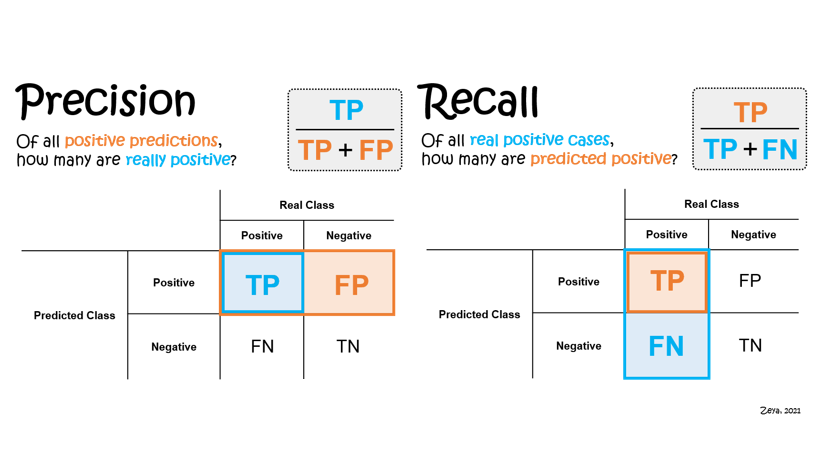

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      1.00      1.00       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [61]:
print(confusion_matrix(y_test, predictions))

[[ 976    1    0    0    0    0    1    1    1    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   1    2 1025    0    0    0    1    3    0    0]
 [   0    0    0 1004    0    5    0    0    1    0]
 [   0    0    0    0  977    0    3    0    0    2]
 [   0    0    0    1    0  890    1    0    0    0]
 [   3    3    0    0    1    1  949    0    1    0]
 [   0    3    4    0    0    1    0 1020    0    0]
 [   0    0    1    1    0    0    0    1  970    1]
 [   2    0    0    1    7    3    0    3    1  992]]


In [62]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.020286105573177338
Test accuracy: 0.9937000274658203


In [63]:
my_number = X_test[120]

In [57]:
my_number.shape

(28, 28, 1)

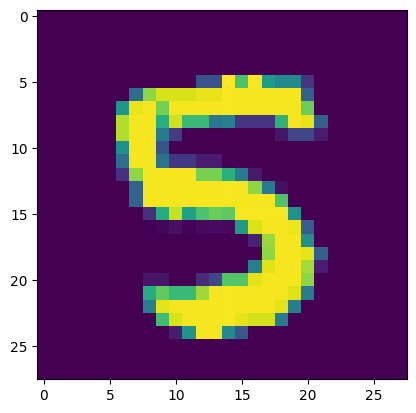

In [64]:
plt.imshow(my_number); 

In [65]:
model.predict(my_number.reshape(1,28,28,1))

1/1 [==============================] - 0s 50ms/step


array([[1.05594616e-10, 1.42268886e-09, 1.53732374e-11, 1.27793939e-07,
        4.81901230e-09, 9.99998927e-01, 1.49825823e-08, 2.43039894e-10,
        5.71218406e-09, 9.54737970e-07]], dtype=float32)

In [68]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 96ms/step


array([5], dtype=int64)

Test verisetindeki ilk 18 resim : 


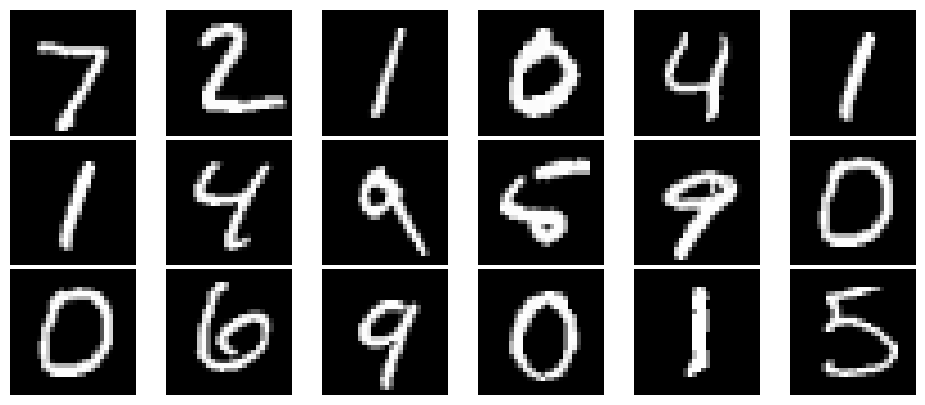

Test verisetindeki tahminler : 
1/1 [==============================] - 0s 43ms/step


array([[7, 2, 1, 0, 4, 1],
       [1, 4, 9, 5, 9, 0],
       [0, 6, 9, 0, 1, 5]], dtype=int64)

In [71]:
print("Test verisetindeki ilk 18 resim : ")
num_rows, num_cols = 3, 6                                       # Datadan 3 tane row, 6 tane column sectik.
f, ax = plt.subplots(3, 6, figsize=(12,5),
                     gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                     squeeze=True)
X_test_idx = []
for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_test[image_index], cmap='gray')
        X_test_idx.append(image_index)

plt.show()
plt.close()

print("Test verisetindeki tahminler : ")
np.reshape(np.argmax(model.predict(X_test[X_test_idx].reshape(18,28,28,1)),axis=1),(3,6))



Baştaki 1 sayısı, modelin kaç örneği işlediğini ifade eder. Bu sayıyı değiştirmek, modelin ne kadar veri üzerinde tahmin yapacağını belirler.

Eğer bu sayıyı 5 olarak ayarlarsanız, model beş ayrı örnek üzerinde tahmin yapar. Yani, beş farklı giriş örneği model tarafından işlenir ve her biri için ayrı tahmin sonuçları üretilir. Bu nedenle çıktı, beş ayrı tahmin sonucunu içerecektir.

model.predict(my_number.reshape(5, 28, 28, 1))

Yukarıdaki kod, "my_number" adlı giriş örneğini beş ayrı örnek olarak kabul eder ve modeli bu beş örnek üzerinde çalıştırır. Sonuç olarak, beş farklı tahmin sonucu elde edilir. Bu, modelin birden çok örnekle aynı anda çalıştırılmasına olanak tanır.


In [60]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([5], dtype=int64)

In [73]:
model.save("cnn_1_complex.h5")

c:\Users\nazim\anaconda3\envs\newenv2\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Aşağıda ki kod Alternatif model yükleme (en son sürümde aşağıda ki kod ile model kaydediyoruz)

In [72]:
from tensorflow.keras.saving import save_model

save_model(model, 'cnn_1_complex.keras')

In [76]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist

# MNIST verisetini yükle
(_, _), (X_test, y_test) = mnist.load_data()

# Modeli yükle
model = load_model("cnn_1_complex.keras")

# Örnek veri seç ve modelimizden tahmin al
idx = np.random.randint(0, X_test.shape[0])
sample = X_test[idx]
prediction = model.predict(sample.reshape(1, 28, 28, 1))

# Tahmin sonucunu ekrana yazdır
print("Tahmin edilen test datası index değeri:" , idx)
print(f"Gerçek Etiket: {y_test[idx]}")
print(f"Tahmin Edilen Etiket: {np.argmax(prediction)}")


1/1 [==============================] - 0s 355ms/step
Tahmin edilen test datası index değeri: 3129
Gerçek Etiket: 3
Tahmin Edilen Etiket: 8


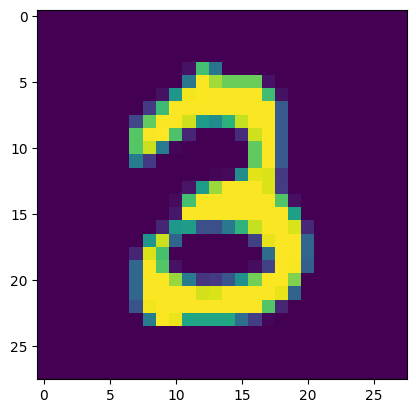

In [77]:
plt.imshow(X_test[3129])

Bu kod bloğunu çalıştırdığımızda, rastgele bir resim seçilir, bu resim modelimize verilir ve modelimizden tahmin alınır. Sonuç olarak gerçek etiket ve tahmin edilen etiket ekrana yazdırılır.

Bu kod önce X_test'den rastgele bir örnek (sample) seçer, ardından bu örneği modelin girdi şekline (input shape) uygun olarak yeniden boyutlandırır. Daha sonra predict() fonksiyonunu kullanarak bu örneğin sınıf tahminini alır.

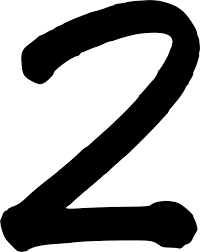

In [84]:
from PIL import Image
image = Image.open("two.png").convert('L')
image

In [96]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Modeli test etmek için bir resim yükleyelim
image = Image.open("two.png").convert('L')

image = image.resize((28, 28))
image_array = np.array(image)
image_array = image_array.reshape(1, 28, 28, 1)

# Modeli yükleyip tahmin yapalım
model = tf.keras.models.load_model('cnn_1_complex.keras')
prediction = model.predict(image_array)

# Tahmin sonucunu ekrana yazdıralım
print("Yukarıda gerçek görüntüsü verilen resim için tahmin edilen değer:", np.argmax(prediction))

1/1 [==============================] - 1s 846ms/step
Yukarıda gerçek görüntüsü verilen resim için tahmin edilen değer: 8


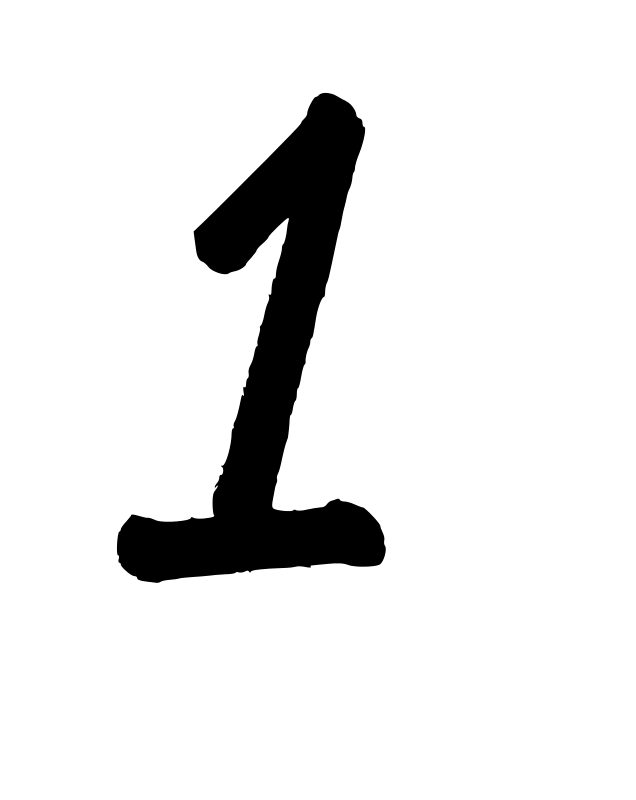

In [90]:
image2 = Image.open("one.png").convert('')
image2

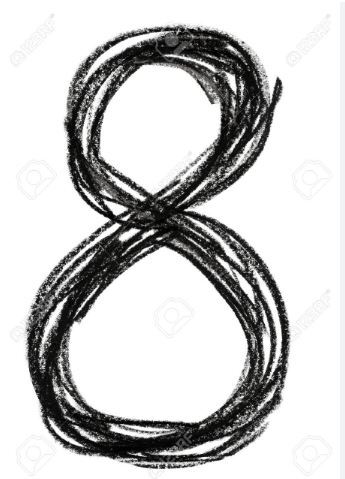

In [100]:
image3 = Image.open("eight.jpg")
image3

In [95]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Modeli test etmek için bir resim yükleyelim
image = Image.open("one.png").convert('L')
image = image.resize((28, 28))
image_array = np.array(image)
image_array = image_array.reshape(1, 28, 28, 1)

# Modeli yükleyip tahmin yapalım
model = tf.keras.models.load_model('cnn_1_complex.keras')
prediction = model.predict(image_array)

# Tahmin sonucunu ekrana yazdıralım
print("Yukarıda gerçek görüntüsü verilen resim için tahmin edilen değer:", np.argmax(prediction))

1/1 [==============================] - 1s 898ms/step
Yukarıda gerçek görüntüsü verilen resim için tahmin edilen değer: 1


In [98]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Modeli test etmek için bir resim yükleyelim
image = Image.open("eight.JPG").convert('L')
image = image.resize((28, 28))
image_array = np.array(image)
image_array = image_array.reshape(1, 28, 28, 1)

# Modeli yükleyip tahmin yapalım
model = tf.keras.models.load_model('cnn_1_complex.keras')
prediction = model.predict(image_array)

# Tahmin sonucunu ekrana yazdıralım
print("Yukarıda gerçek görüntüsü verilen resim için tahmin edilen değer:", np.argmax(prediction))

1/1 [==============================] - 1s 884ms/step
Yukarıda gerçek görüntüsü verilen resim için tahmin edilen değer: 8
